In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Turn off scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Import data
tn_budget = pd.read_csv('Data/Zipped_Data/tn.movie_budgets.csv.gz',
                        compression='gzip')
bom_gross = pd.read_csv('Data/Zipped_Data/bom.movie_gross.csv.gz',
                        compression='gzip')
imbd_basics = pd.read_csv('Data/Zipped_Data/imdb.title.basics.csv.gz',
                          compression='gzip')
imbd_name = pd.read_csv('Data/Zipped_Data/imdb.name.basics.csv.gz',
                        compression='gzip')
imbd_principals = pd.read_csv('Data/Zipped_Data/imdb.title.principals.csv.gz',
                              compression='gzip')

In [2]:
# Remove punctuation from producton and worldwide.
# Switch variables from string to float.
tn_budget['production_budget'] = tn_budget['production_budget'].\
 apply(lambda x: x.translate(str.maketrans
                             ('', '', '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')))
tn_budget['worldwide_gross'] = tn_budget['worldwide_gross'].\
 apply(lambda x: x.translate(str.maketrans
                             ('', '', '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')))
tn_budget['production_budget'] = pd.to_numeric(tn_budget.production_budget,
                                               downcast='float',
                                               errors='coerce')
tn_budget['worldwide_gross'] = pd.to_numeric(tn_budget.worldwide_gross,
                                             downcast='float',
                                             errors='coerce')

In [3]:
# Create column for net profit (worldwide gross minus production budget).
tn_budget['net'] = list(tn_budget.apply(lambda x:
                                        x.worldwide_gross
                                        - x.production_budget,
                                        axis=1))

# Create column for ratio (net profit divided by production budget)
tn_budget['ratio'] = list(tn_budget.apply
                          (lambda x: x.net / x.production_budget, axis=1))

# Rename column 'movie' to 'title'
tn_budget = tn_budget.rename(columns={'movie': 'title'})

# Remove whitespace, potential extra words, punctuation, and case from titles
years = [r'\(2010\)', r"\(2011\)",
         r"\(2012\)", r"\(2013\)", r"\(2014\)",
         r"\(2015\)", r"\(2016\)", r"\(2017\)", r"\(2018\)"]
tn_budget.title = tn_budget.title.replace(years, value='', regex=True)
tn_budget.title = tn_budget.title.str.strip()
tn_budget.title = tn_budget.title.apply(lambda x: x.lower())
tn_budget.title = tn_budget.title.\
apply(lambda x: x.translate(str.maketrans
                             ('', '', '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')))
tn_budget.title = tn_budget.title.replace(['the', 'and', 'â'], value='', regex=True)

# Remove month and year from date. Drop redundant columns
tn_budget['year'] = list(tn_budget['release_date'].str[-4:])
tn_budget = tn_budget.drop(columns=['id', 'domestic_gross', 'release_date'])

In [4]:
# Remove 'studio', 'domestic_gross', 'foreign_gross' column.
# Set 'foreign_gross' to float and 'year' to string
bom_gross = bom_gross.drop(columns=['domestic_gross', 'foreign_gross'])
bom_gross['year'] = bom_gross['year'].astype(str)

# Remove years and right whitespace from titles.
# Remove potentially extraneous words.
years = [r'\(2010\)', r"\(2011\)",
         r"\(2012\)", r"\(2013\)", r"\(2014\)",
         r"\(2015\)", r"\(2016\)", r"\(2017\)", r"\(2018\)"]
bom_gross.title = bom_gross.title.replace(years, value='', regex=True)
bom_gross.title = bom_gross.title.str.strip()
bom_gross.title = bom_gross.title.apply(lambda x: x.lower())
bom_gross.title = bom_gross.title.\
apply(lambda x: x.translate(str.maketrans
                             ('', '', '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')))
bom_gross.title = bom_gross.title.replace(['the', 'and', 'â'], value='', regex=True)

In [5]:
# Merge tn_budget and bom_gross
merged_df = pd.merge(tn_budget, bom_gross, on=["title", "year"], how="left")

# Replace null studio values
merged_df['studio'] = merged_df.studio.fillna('Unknown')

In [6]:
imbd_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [7]:
# Create 'year' string column from 'start_year'
imbd_basics['year'] = imbd_basics['start_year'].astype(str)

# Drop unused columns
imbd_basics = imbd_basics.drop(columns=['original_title', 'start_year',])

# Rename column for easier merging
imbd_basics = imbd_basics.rename(columns={'primary_title': 'title'})

# Remove years and right whitespace from titles.
# Remove potentially extraneous words.
years = [r'\(2010\)', r"\(2011\)",
         r"\(2012\)", r"\(2013\)", r"\(2014\)",
         r"\(2015\)", r"\(2016\)", r"\(2017\)", r"\(2018\)"]
imbd_basics.title = imbd_basics.title.replace(years, value='', regex=True)
imbd_basics.title = imbd_basics.title.str.strip()
imbd_basics.title = imbd_basics.title.apply(lambda x: x.lower())
imbd_basics.title = imbd_basics.title.\
apply(lambda x: x.translate(str.maketrans
                             ('', '', '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')))
imbd_basics.title = imbd_basics.title.replace(['the', 'and', "â"],
                                              value='',
                                              regex=True)

In [8]:
# Merge imbd_basics with merged datafile
merged_df2 = pd.merge(merged_df, imbd_basics, on=["title", "year"], how="left")

# Change year to integer, and remove all films made
# before 2010. Turn year back to string.
merged_df2['year'] = merged_df2['year'].astype(int)
merged_df2 = merged_df2.loc[merged_df2.year >= 2010]
merged_df2['year'] = merged_df2['year'].astype(str)

In [9]:
# Merge imbd_principals and imbd_name
imbd_name_prin = pd.merge(imbd_principals, imbd_name,
                          on=["nconst"], how="left")

# Remove extraneous columns
imbd_name_prin = imbd_name_prin.drop(columns=['ordering',
                                              'nconst', 'job',
                                              'characters', 'birth_year',
                                              'death_year',
                                              'primary_profession',
                                              'known_for_titles'])

In [10]:
# Create list of directors from imbd_name_prin
directors = imbd_name_prin.loc[imbd_name_prin.category == 'director']

In [11]:
# Merge list of directors with merged document
merged_df3 = pd.merge(merged_df2, directors, on=["tconst"], how="left")

# Remove extra columns, rename primary_name to director
merged_df3 = merged_df3.drop(columns=['category', 'runtime_minutes',
                                     'genres'])
merged_df3 = merged_df3.rename(columns={'primary_name': 'director'})

# Fill in null values for director
merged_df3['director'] = merged_df3.director.fillna('Not listed')

In [12]:
# Remove duplicate titles
merged_df_cleaned = merged_df3.loc[~(merged_df3.title.duplicated())]

# Drop extra column
merged_df_cleaned = merged_df_cleaned.drop(columns='tconst')

In [16]:
merged_df_cleaned.loc[merged_df_cleaned.title == 'gods not dead']

,title,production_budget,worldwide_gross,net,ratio,year,studio,director
2122,gods not dead,1150000.00,63777092.00,62627092.00,54.46,2014,Free,Harold Cronk


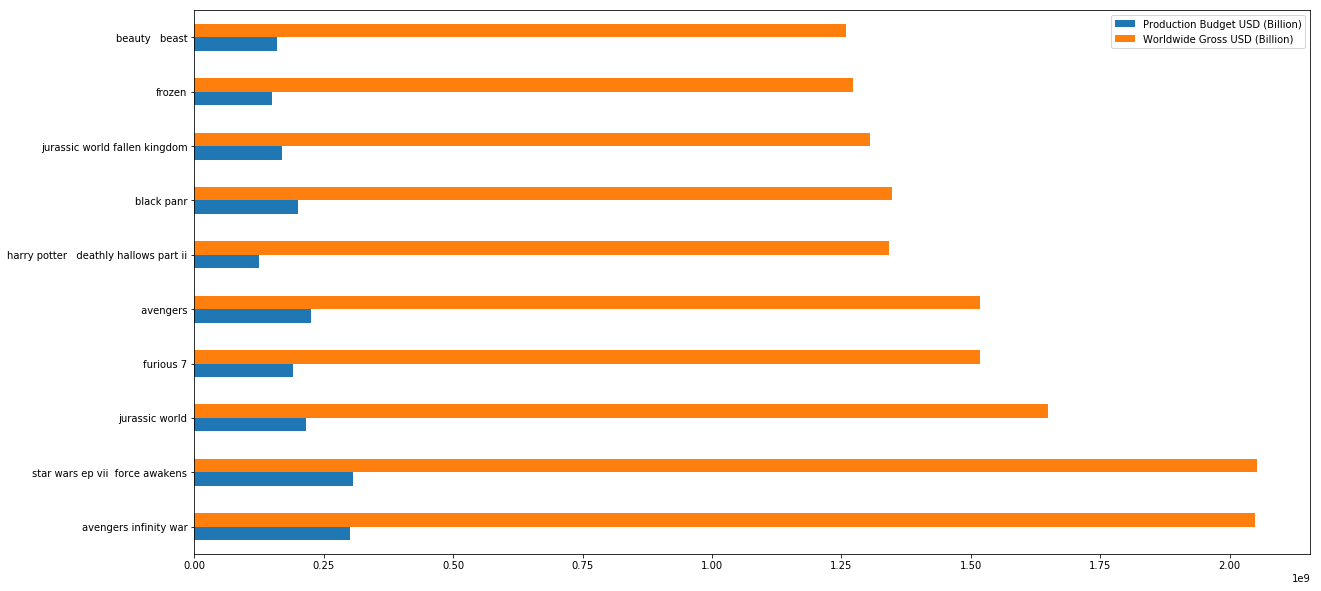

In [17]:
# Create earnings/cost graph for films with top ROI
top_net = merged_df_cleaned.sort_values(by=['net'], ascending=False)[:10]

index = list(top_net['title'])
production_budget = list(top_net['production_budget'])
worldwide_gross = list(top_net['worldwide_gross'])
df = pd.DataFrame({'Production Budget USD (Billion)':
                   production_budget,
                   'Worldwide Gross USD (Billion)':
                   worldwide_gross}, index=index)
ax = df.plot.barh(figsize=(20, 10), rot=0)

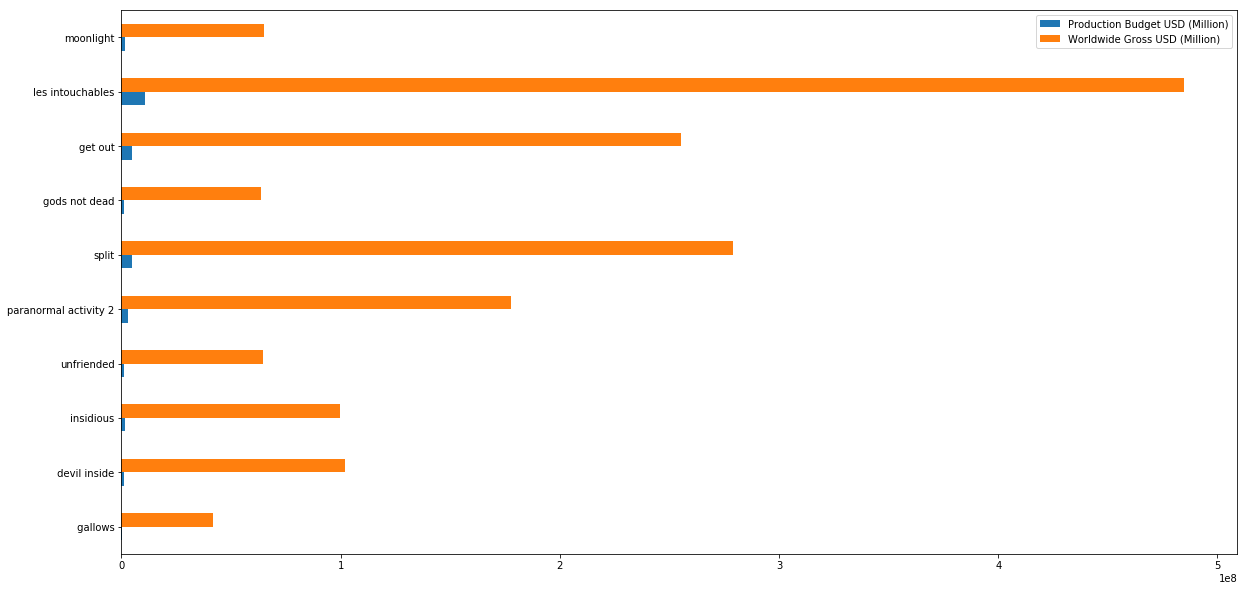

In [18]:
# Create earnings/cost graph for films with top ROI
top_ratio = merged_df_cleaned.sort_values(by=['ratio'], ascending=False)[:10]

index = list(top_ratio['title'])
production_budget = list(top_ratio['production_budget'])
worldwide_gross = list(top_ratio['worldwide_gross'])
df = pd.DataFrame({'Production Budget USD (Million)': production_budget,
                   'Worldwide Gross USD (Million)': worldwide_gross},
                  index=index)
ax = df.plot.barh(figsize=(20, 10), rot=0)

In [19]:
top_ratio

,title,production_budget,worldwide_gross,net,ratio,year,studio,director
2354,gallows,100000.00,41656472.00,41556472.00,415.56,2015,WB (NL),Travis Cluff
2131,devil inside,1000000.00,101759488.00,100759488.00,100.76,2012,Par.,William Brent Bell
2066,insidious,1500000.00,99870888.00,98370888.00,65.58,2011,FD,Not listed
2132,unfriended,1000000.00,64364200.00,63364200.00,63.36,2015,Uni.,Not listed
1893,paranormal activity 2,3000000.00,177512032.00,174512032.00,58.17,2010,Par.,Tod Williams
1704,split,5000000.00,278964800.00,273964800.00,54.79,2017,Uni.,Not listed
2122,gods not dead,1150000.00,63777092.00,62627092.00,54.46,2014,Free,Harold Cronk
1703,get out,5000000.00,255367952.00,250367952.00,50.07,2017,Uni.,Jordan Peele
1415,les intouchables,10800000.00,484873056.00,474073056.00,43.90,2012,Unknown,Not listed
2067,moonlight,1500000.00,65245512.00,63745512.00,42.50,2016,A24,Barry Jenkins


In [21]:
# Create a list of 20 studios with the top ratio means
studio_ratio_mean = (merged_df_cleaned.groupby
                     (['studio']).ratio.mean().
                     sort_values(ascending=False)[:20])

# Create a list of 20 directors with the top ratio means
director_ratio_mean = (merged_df_cleaned.groupby
                       (['director']).ratio.mean().
                       sort_values(ascending=False)[0:20])

# Create a list of 19 directors with the top ROI means,
# with top value removed
director_ratio_mean_19 = (merged_df_cleaned.groupby
                          (['director']).ratio.mean().
                          sort_values(ascending=False)[1:20])

# Provides a count for the number of films made by
# each director with a top-20 ROI
director_roi_count = (merged_df_cleaned.groupby
                      ('director')['ratio', 'title'].agg
                      ({'ratio': 'mean', 'title': 'nunique'})
                      .sort_values
                      (by='ratio', ascending=False))[0:20].reset_index()

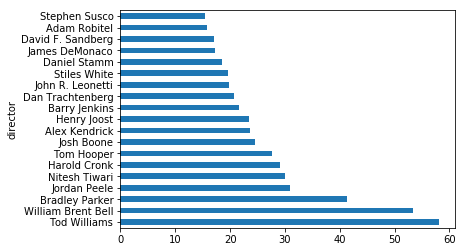

In [22]:
# Creates a graph of the 2-20 directors with the best ROI
director_ratio_mean_19.plot(kind='barh')

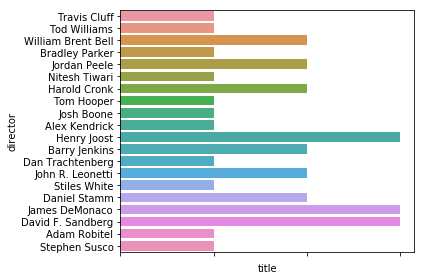

In [23]:
# Make a barplot - top 20 directors by ROI - Count
top_20_directors_roi_count = (merged_df_cleaned.groupby
                              ('director')['ratio', 'title']
                              .agg({'ratio':
                                    'mean', 'title': 'nunique'})
                              .sort_values
                              (by='ratio',
                               ascending=False))[0:20].reset_index()
ax = sns.barplot(x=top_20_directors_roi_count['title'],
                 y=top_20_directors_roi_count['director'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 1
plt.tight_layout()
plt.show()